In [2]:
import numpy as np
import pandas as pd

In [3]:
df2 = pd.read_csv(r"C:\Users\ADMIN\Downloads\archive (17)\customer_churn_dataset-testing-master.csv")
df1 = pd.read_csv(r"C:\Users\ADMIN\Downloads\archive (17)\customer_churn_dataset-training-master.csv")

In [4]:
df1.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
df2.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [6]:
df1.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [7]:
df1.dropna(inplace=True)

In [8]:
df1.duplicated().sum()

np.int64(0)

In [9]:
df = df1[['Tenure','Usage Frequency','Support Calls','Payment Delay','Last Interaction','Total Spend','Subscription Type','Churn']]

In [10]:
df

,Tenure,Usage Frequency,Support Calls,Payment Delay,Last Interaction,Total Spend,Subscription Type,Churn
0,39.0,14.0,5.0,18.0,17.0,932.00,Standard,1.0
1,49.0,1.0,10.0,8.0,6.0,557.00,Basic,1.0
2,14.0,4.0,6.0,18.0,3.0,185.00,Basic,1.0
3,38.0,21.0,7.0,7.0,29.0,396.00,Standard,1.0
4,32.0,20.0,5.0,8.0,20.0,617.00,Basic,1.0
...,...,...,...,...,...,...,...,...
440828,54.0,15.0,1.0,3.0,8.0,716.38,Premium,0.0
440829,8.0,13.0,1.0,20.0,2.0,745.38,Premium,0.0
440830,35.0,27.0,1.0,5.0,9.0,977.31,Standard,0.0
440831,55.0,14.0,2.0,0.0,2.0,602.55,Standard,0.0


In [11]:
#from sklearn.preprocessing import StandardScaler
#ss = StandardScaler()
#ss.fit_transform(df['Total Spend'])

In [12]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories=[['Standard','Premium','Basic']],sparse_output=False)
encoded = encoder.fit_transform(df[['Subscription Type']])

In [13]:
df['Subscription Type'].unique()

array(['Standard', 'Basic', 'Premium'], dtype=object)

In [14]:
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['Subscription Type'])
)

df = pd.concat([df, encoded_df], axis=1)

In [15]:
df.drop(columns='Subscription Type',inplace=True)

In [16]:
df.head()

,Tenure,Usage Frequency,Support Calls,Payment Delay,Last Interaction,Total Spend,Churn,Subscription Type_Standard,Subscription Type_Premium,Subscription Type_Basic
0,39.0,14.0,5.0,18.0,17.0,932.0,1.0,1.0,0.0,0.0
1,49.0,1.0,10.0,8.0,6.0,557.0,1.0,0.0,0.0,1.0
2,14.0,4.0,6.0,18.0,3.0,185.0,1.0,0.0,0.0,1.0
3,38.0,21.0,7.0,7.0,29.0,396.0,1.0,1.0,0.0,0.0
4,32.0,20.0,5.0,8.0,20.0,617.0,1.0,0.0,0.0,1.0


In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

Tenure                        0
Usage Frequency               0
Support Calls                 0
Payment Delay                 0
Last Interaction              0
Total Spend                   0
Churn                         0
Subscription Type_Standard    0
Subscription Type_Premium     0
Subscription Type_Basic       0
dtype: int64

In [19]:
df['Tenure'] = df['Tenure'].astype('int32')

In [20]:
df[['Usage Frequency', 'Support Calls', 'Payment Delay','Last Interaction','Total Spend']] = df[['Usage Frequency', 'Support Calls', 'Payment Delay','Last Interaction','Total Spend']].astype('int32')

In [21]:
df.head()

,Tenure,Usage Frequency,Support Calls,Payment Delay,Last Interaction,Total Spend,Churn,Subscription Type_Standard,Subscription Type_Premium,Subscription Type_Basic
0,39,14,5,18,17,932,1.0,1.0,0.0,0.0
1,49,1,10,8,6,557,1.0,0.0,0.0,1.0
2,14,4,6,18,3,185,1.0,0.0,0.0,1.0
3,38,21,7,7,29,396,1.0,1.0,0.0,0.0
4,32,20,5,8,20,617,1.0,0.0,0.0,1.0


In [22]:
df[['Subscription Type_Standard',
    'Subscription Type_Premium',
    'Subscription Type_Basic']].sum()

Subscription Type_Standard    149128.0
Subscription Type_Premium     148678.0
Subscription Type_Basic       143025.0
dtype: float64

In [23]:
df[['Subscription Type_Standard','Subscription Type_Premium','Subscription Type_Basic']] = df[['Subscription Type_Standard','Subscription Type_Premium','Subscription Type_Basic']].astype('int32')

In [24]:
df['Churn'] = df['Churn'].astype('int32')

In [25]:
df.sample(5)

,Tenure,Usage Frequency,Support Calls,Payment Delay,Last Interaction,Total Spend,Churn,Subscription Type_Standard,Subscription Type_Premium,Subscription Type_Basic
135605,17,13,1,3,12,759,1,0,1,0
206776,29,27,7,8,8,345,1,0,1,0
5213,33,1,7,26,18,339,1,0,1,0
8611,7,27,0,13,19,940,1,1,0,0
35764,28,28,9,17,20,507,1,0,0,1


In [26]:
df['Churn'].value_counts()

Churn
1    249999
0    190832
Name: count, dtype: int64

In [27]:
df.describe()

,Tenure,Usage Frequency,Support Calls,Payment Delay,Last Interaction,Total Spend,Churn,Subscription Type_Standard,Subscription Type_Premium,Subscription Type_Basic
count,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000
mean,31.256298,15.807484,3.604443,12.965719,14.480853,631.344917,0.567108,0.338288,0.337268,0.324444
std,17.255729,8.586249,3.070219,8.258072,8.596212,240.722966,0.495477,0.473128,0.472778,0.468167
min,1.000000,1.000000,0.000000,0.000000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,9.000000,1.000000,6.000000,7.000000,480.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,16.000000,3.000000,12.000000,14.000000,661.000000,1.000000,0.000000,0.000000,0.000000
75%,46.000000,23.000000,6.000000,19.000000,22.000000,830.000000,1.000000,1.000000,1.000000,1.000000
max,60.000000,30.000000,10.000000,30.000000,30.000000,1000.000000,1.000000,1.000000,1.000000,1.000000


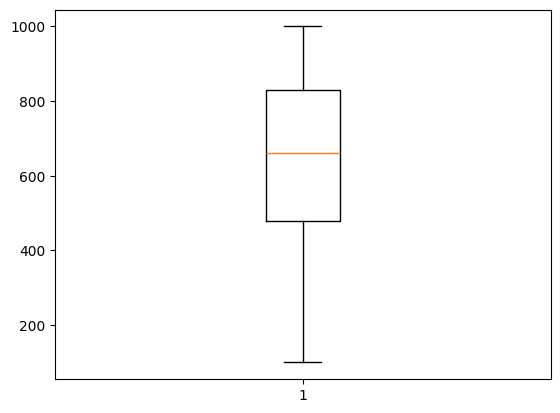

In [28]:
import matplotlib.pyplot as plt

plt.boxplot(df['Total Spend'])
plt.show()


In [29]:
df.corr()['Churn'].sort_values(ascending=False)

Churn                         1.000000
Support Calls                 0.574266
Payment Delay                 0.312130
Last Interaction              0.149618
Subscription Type_Basic       0.020481
Subscription Type_Standard   -0.009239
Subscription Type_Premium    -0.011035
Usage Frequency              -0.046100
Tenure                       -0.051917
Total Spend                  -0.428721
Name: Churn, dtype: float64

In [30]:
df.groupby("Churn")["Usage Frequency"].mean()

Churn
0    16.260533
1    15.461658
Name: Usage Frequency, dtype: float64

In [31]:
df.groupby("Churn")["Tenure"].mean()

Churn
0    32.281672
1    30.473598
Name: Tenure, dtype: float64

In [32]:
df.groupby("Churn")["Payment Delay"].mean()

Churn
0    10.015480
1    15.217729
Name: Payment Delay, dtype: float64

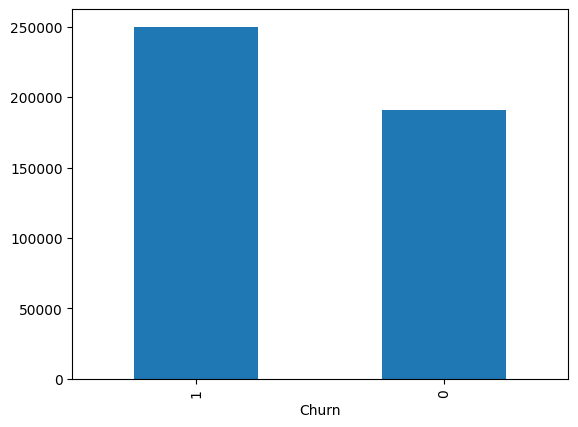

In [33]:
df['Churn'].value_counts().plot(kind="bar")
plt.show()

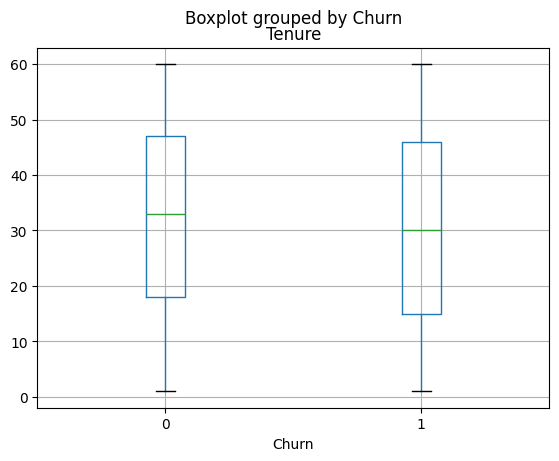

In [34]:
import matplotlib.pyplot as plt

df.boxplot(column="Tenure", by="Churn")
plt.show()


In [35]:
df.to_csv("clean_churn_data.csv", index=False)

In [36]:
df

,Tenure,Usage Frequency,Support Calls,Payment Delay,Last Interaction,Total Spend,Churn,Subscription Type_Standard,Subscription Type_Premium,Subscription Type_Basic
0,39,14,5,18,17,932,1,1,0,0
1,49,1,10,8,6,557,1,0,0,1
2,14,4,6,18,3,185,1,0,0,1
3,38,21,7,7,29,396,1,1,0,0
4,32,20,5,8,20,617,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
440827,6,25,2,15,2,837,0,0,1,0
440828,54,15,1,3,8,716,0,0,1,0
440829,8,13,1,20,2,745,0,1,0,0
440830,35,27,1,5,9,977,0,1,0,0


In [37]:
!pip install xgboost

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [38]:
!conda install -c conda-forge xgboost -y

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [39]:
from xgboost import XGBClassifier

In [40]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [62]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
model = XGBClassifier(n_estimators=400,
    learning_rate=0.01,
    max_depth=3,
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=42,
    )
model.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1.0
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [64]:
y_pred = model.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.920276293851441

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[37831,   232],
       [ 6797, 43307]])

In [91]:
df[df["Support Calls"] >= 5]["Churn"].value_counts(normalize=True)

Churn
1    0.990818
0    0.009182
Name: proportion, dtype: float64

In [69]:
y_prob = model.predict_proba(x_test)[:,1]

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,y_prob)

In [73]:
threshold

array([       inf, 0.99221343, 0.99219245, 0.99217927, 0.99211287,
       0.99210256, 0.99182785, 0.99169827, 0.99132276, 0.9912867 ,
       0.99113363, 0.99112892, 0.99089277, 0.99072802, 0.98894137,
       0.98781073, 0.98778176, 0.9872089 , 0.9871242 , 0.98708177,
       0.98697829, 0.98649442, 0.98621339, 0.98582864, 0.98573017,
       0.98557347, 0.98520535, 0.9836849 , 0.98343623, 0.9826985 ,
       0.98213381, 0.98147959, 0.98107338, 0.98022354, 0.98013091,
       0.97979033, 0.97952372, 0.97776824, 0.9761554 , 0.97519398,
       0.97498614, 0.9740935 , 0.97352308, 0.97330171, 0.97320187,
       0.97309566, 0.97230238, 0.97178823, 0.97140086, 0.97128761,
       0.97035575, 0.97022891, 0.9687866 , 0.96823454, 0.96623093,
       0.90280688, 0.89844024, 0.89677644, 0.88518173, 0.86663133,
       0.8645249 , 0.85349214, 0.51839042, 0.5061993 , 0.50167376,
       0.39779234, 0.38616329, 0.38188097, 0.36047798, 0.31156525,
       0.30119622, 0.29739958, 0.25858101, 0.25483021, 0.24933

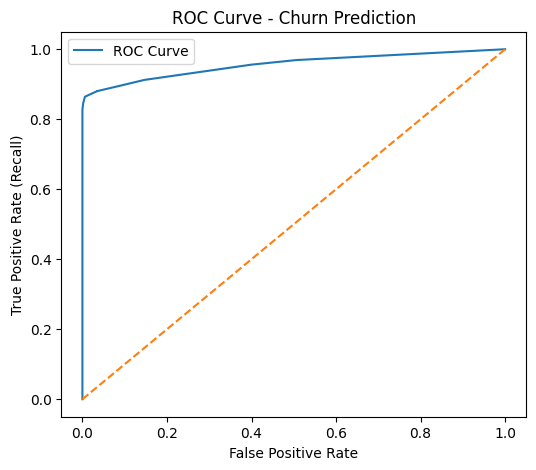

In [75]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="ROC Curve")

plt.plot([0,1], [0,1], linestyle="--")  # Random guess line

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Churn Prediction")
plt.legend()
plt.show()

In [77]:
import numpy as np

best_idx = np.argmax(tpr - fpr)
best_threshold = threshold[best_idx]

print("Best Threshold:", best_threshold)


Best Threshold: 0.518390417098999


In [78]:
y_pred_new = (y_prob >= best_threshold).astype(int)

In [79]:
accuracy_score(y_test,y_pred_new)

0.920276293851441

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
import pickle

In [87]:
pipe = Pipeline([
    ('model' , XGBClassifier())
])

In [88]:
pipe.fit(x_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None


In [89]:
import pickle

pickle.dump(pipe, open("churn_pipeline.pkl", "wb"))

print("Pipeline saved successfully!")

Pipeline saved successfully!


In [90]:
df.head()

,Tenure,Usage Frequency,Support Calls,Payment Delay,Last Interaction,Total Spend,Churn,Subscription Type_Standard,Subscription Type_Premium,Subscription Type_Basic
0,39,14,5,18,17,932,1,1,0,0
1,49,1,10,8,6,557,1,0,0,1
2,14,4,6,18,3,185,1,0,0,1
3,38,21,7,7,29,396,1,1,0,0
4,32,20,5,8,20,617,1,0,0,1


In [85]:
df

,Tenure,Usage Frequency,Support Calls,Payment Delay,Last Interaction,Total Spend,Churn,Subscription Type_Standard,Subscription Type_Premium,Subscription Type_Basic
0,39,14,5,18,17,932,1,1,0,0
1,49,1,10,8,6,557,1,0,0,1
2,14,4,6,18,3,185,1,0,0,1
3,38,21,7,7,29,396,1,1,0,0
4,32,20,5,8,20,617,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
440827,6,25,2,15,2,837,0,0,1,0
440828,54,15,1,3,8,716,0,0,1,0
440829,8,13,1,20,2,745,0,1,0,0
440830,35,27,1,5,9,977,0,1,0,0


In [74]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob)

0.9555021962902928

In [42]:
df2.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [43]:
test_df = df2[['Tenure','Usage Frequency','Support Calls','Payment Delay','Last Interaction','Total Spend','Subscription Type','Churn']]

In [44]:
test_df.isnull().sum()

Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Last Interaction     0
Total Spend          0
Subscription Type    0
Churn                0
dtype: int64

In [45]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories=[['Standard','Premium','Basic']],sparse_output=False)
encoded = encoder.fit_transform(test_df[['Subscription Type']])

In [46]:
encoded_df1 = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['Subscription Type'])
)

test_df = pd.concat([test_df, encoded_df1], axis=1)

In [47]:
test_df.drop(columns=['Subscription Type'],inplace=True)

In [48]:
test_df[['Subscription Type_Standard','Subscription Type_Premium','Subscription Type_Basic']] = test_df[['Subscription Type_Standard','Subscription Type_Premium','Subscription Type_Basic']].astype('int32')

In [49]:
X_test = test_df.drop('Churn',axis=1)
y_test = test_df['Churn']

In [50]:
y_prob = model.predict_proba(X_test)[:,1]
y_pred = (y_prob > 0.6).astype(int)


In [51]:
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.588125640786653

In [53]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))


[[ 7699 26182]
 [  332 30161]]


In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6081743797535569

In [55]:
df1.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [57]:
y_prob = model.predict_proba(X_test)[:,1]

y_pred = (y_prob > 0.65).astype(int)


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth": [3,5,7],
    "learning_rate": [0.01,0.05,0.1],
    "n_estimators": [200,400],
    "subsample": [0.7,0.8,1.0],
    "colsample_bytree": [0.7,0.8,1.0]
}

xgb = XGBClassifier(eval_metric="logloss")

grid = GridSearchCV(xgb, params, cv=3, scoring="accuracy", verbose=1)

grid.fit(X, y)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400, 'subsample': 1.0}
Best Score: 0.8739811442935835


In [58]:
y_prob = model.predict_proba(X_test)[:,1]

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

y_pred = model.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred)

0.5894149812035915

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

model.fit(X, y)
y_pred_rf = model.predict(X_test)


In [ ]:
accuracy_score(y_test,y_pred_rf)

NameError: name 'accuracy_score' is not defined

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel="rbf", probability=True)
model.fit(X, y)

y_pred_svm = model.predict(X_test)


In [ ]:
accuracy_score(y_test,y_pred_svm)